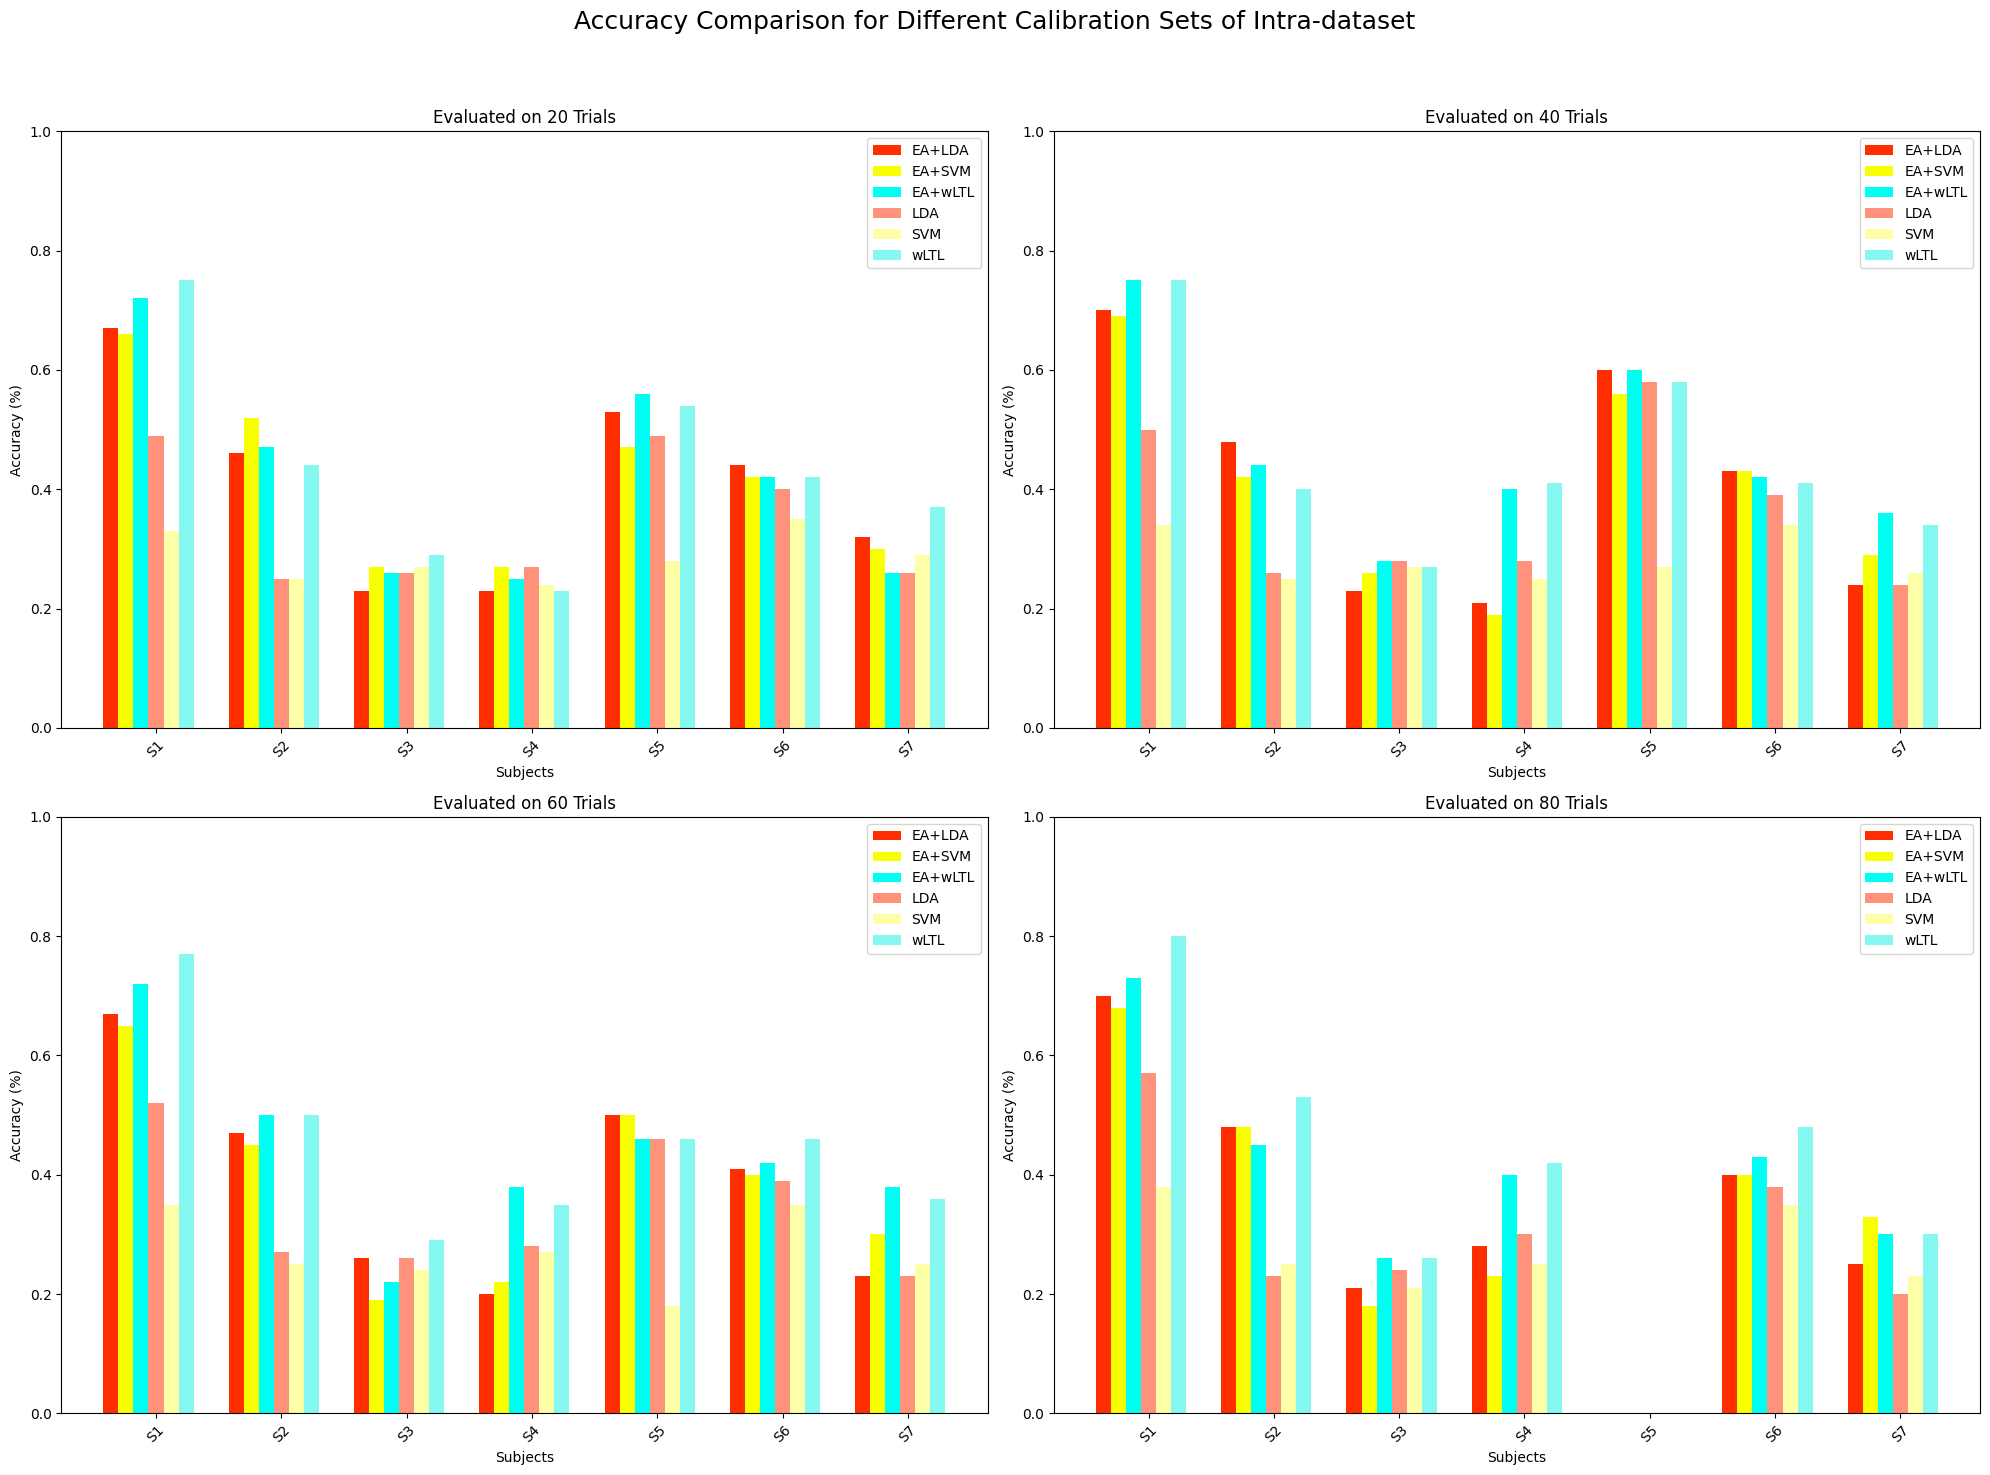

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load data from Excel
# Replace the path with your Excel file path if using locally
file_path = 'Result.xlsx'  # Make sure this file is in your working directory
xls = pd.ExcelFile(file_path)

# Load the specific sheet
df_within_data = pd.read_excel(xls, sheet_name='TF_withinData')

# Step 2: Extract relevant columns and clean the data
data_clean = df_within_data.iloc[1:, [0, 1, 6, 11, 16, 21]]  # Select relevant columns
data_clean.columns = ['Subject', 'Data Condition', '20 Trials', '40 Trials', '60 Trials', '80 Trials']

# Forward fill subject names to handle merged cells in original Excel sheet
data_clean['Subject'] = data_clean['Subject'].fillna(method='ffill')

# Step 3: Pivot the data to group by subject and data condition for easier extraction
pivoted_data = data_clean.pivot(index='Subject', columns='Data Condition', values=['20 Trials', '40 Trials', '60 Trials', '80 Trials'])

# Step 4: Extract accuracy values for each trial set
subject_labels = pivoted_data.index.tolist()  # Full subject labels
conditions = pivoted_data.columns.levels[1].tolist()  # Extract data condition names

# Extract data for each trial size (20, 40, 60, and 80 trials)
accuracy_20 = np.nan_to_num(pivoted_data['20 Trials'].values)
accuracy_40 = np.nan_to_num(pivoted_data['40 Trials'].values)
accuracy_60 = np.nan_to_num(pivoted_data['60 Trials'].values)
accuracy_80 = np.nan_to_num(pivoted_data['80 Trials'].values)

# Define a custom color palette for each condition
color_palette = ['#ff2e00', '#f7ff00', '#00fff3','#ff927a', '#fcffa6', '#85f8f2']

# Step 5: Define a function to plot grouped bars
def plot_grouped_bars(accuracy, title, ax, colors):
    x = np.arange(len(subject_labels))  # the label locations for subjects
    width = 0.12  # the width of the bars

    # Plot each condition as a separate bar within each group
    for i, (condition, color) in enumerate(zip(conditions, colors)):
        bars = ax.bar(x + i * width, accuracy[:, i], width, label=condition, color=color)

    # Formatting
    ax.set_ylim(0, 1)  # Set the y-axis range
    ax.set_xlabel('Subjects')
    ax.set_ylabel('Accuracy (%)')
    ax.set_title(title)
    ax.set_xticks(x + width * (len(conditions) / 2))
    ax.set_xticklabels(subject_labels, rotation=45)
    ax.legend(loc='upper right')

# Step 6: Create the plots for each calibration set
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Plotting for each calibration set separately
plot_grouped_bars(accuracy_20, 'Evaluated on 20 Trials', axes[0, 0], color_palette)
plot_grouped_bars(accuracy_40, 'Evaluated on 40 Trials', axes[0, 1], color_palette)
plot_grouped_bars(accuracy_60, 'Evaluated on 60 Trials', axes[1, 0], color_palette)
plot_grouped_bars(accuracy_80, 'Evaluated on 80 Trials', axes[1, 1], color_palette)

# Layout and overall title
plt.suptitle('Accuracy Comparison for Different Calibration Sets of Intra-dataset', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plots
plt.show()


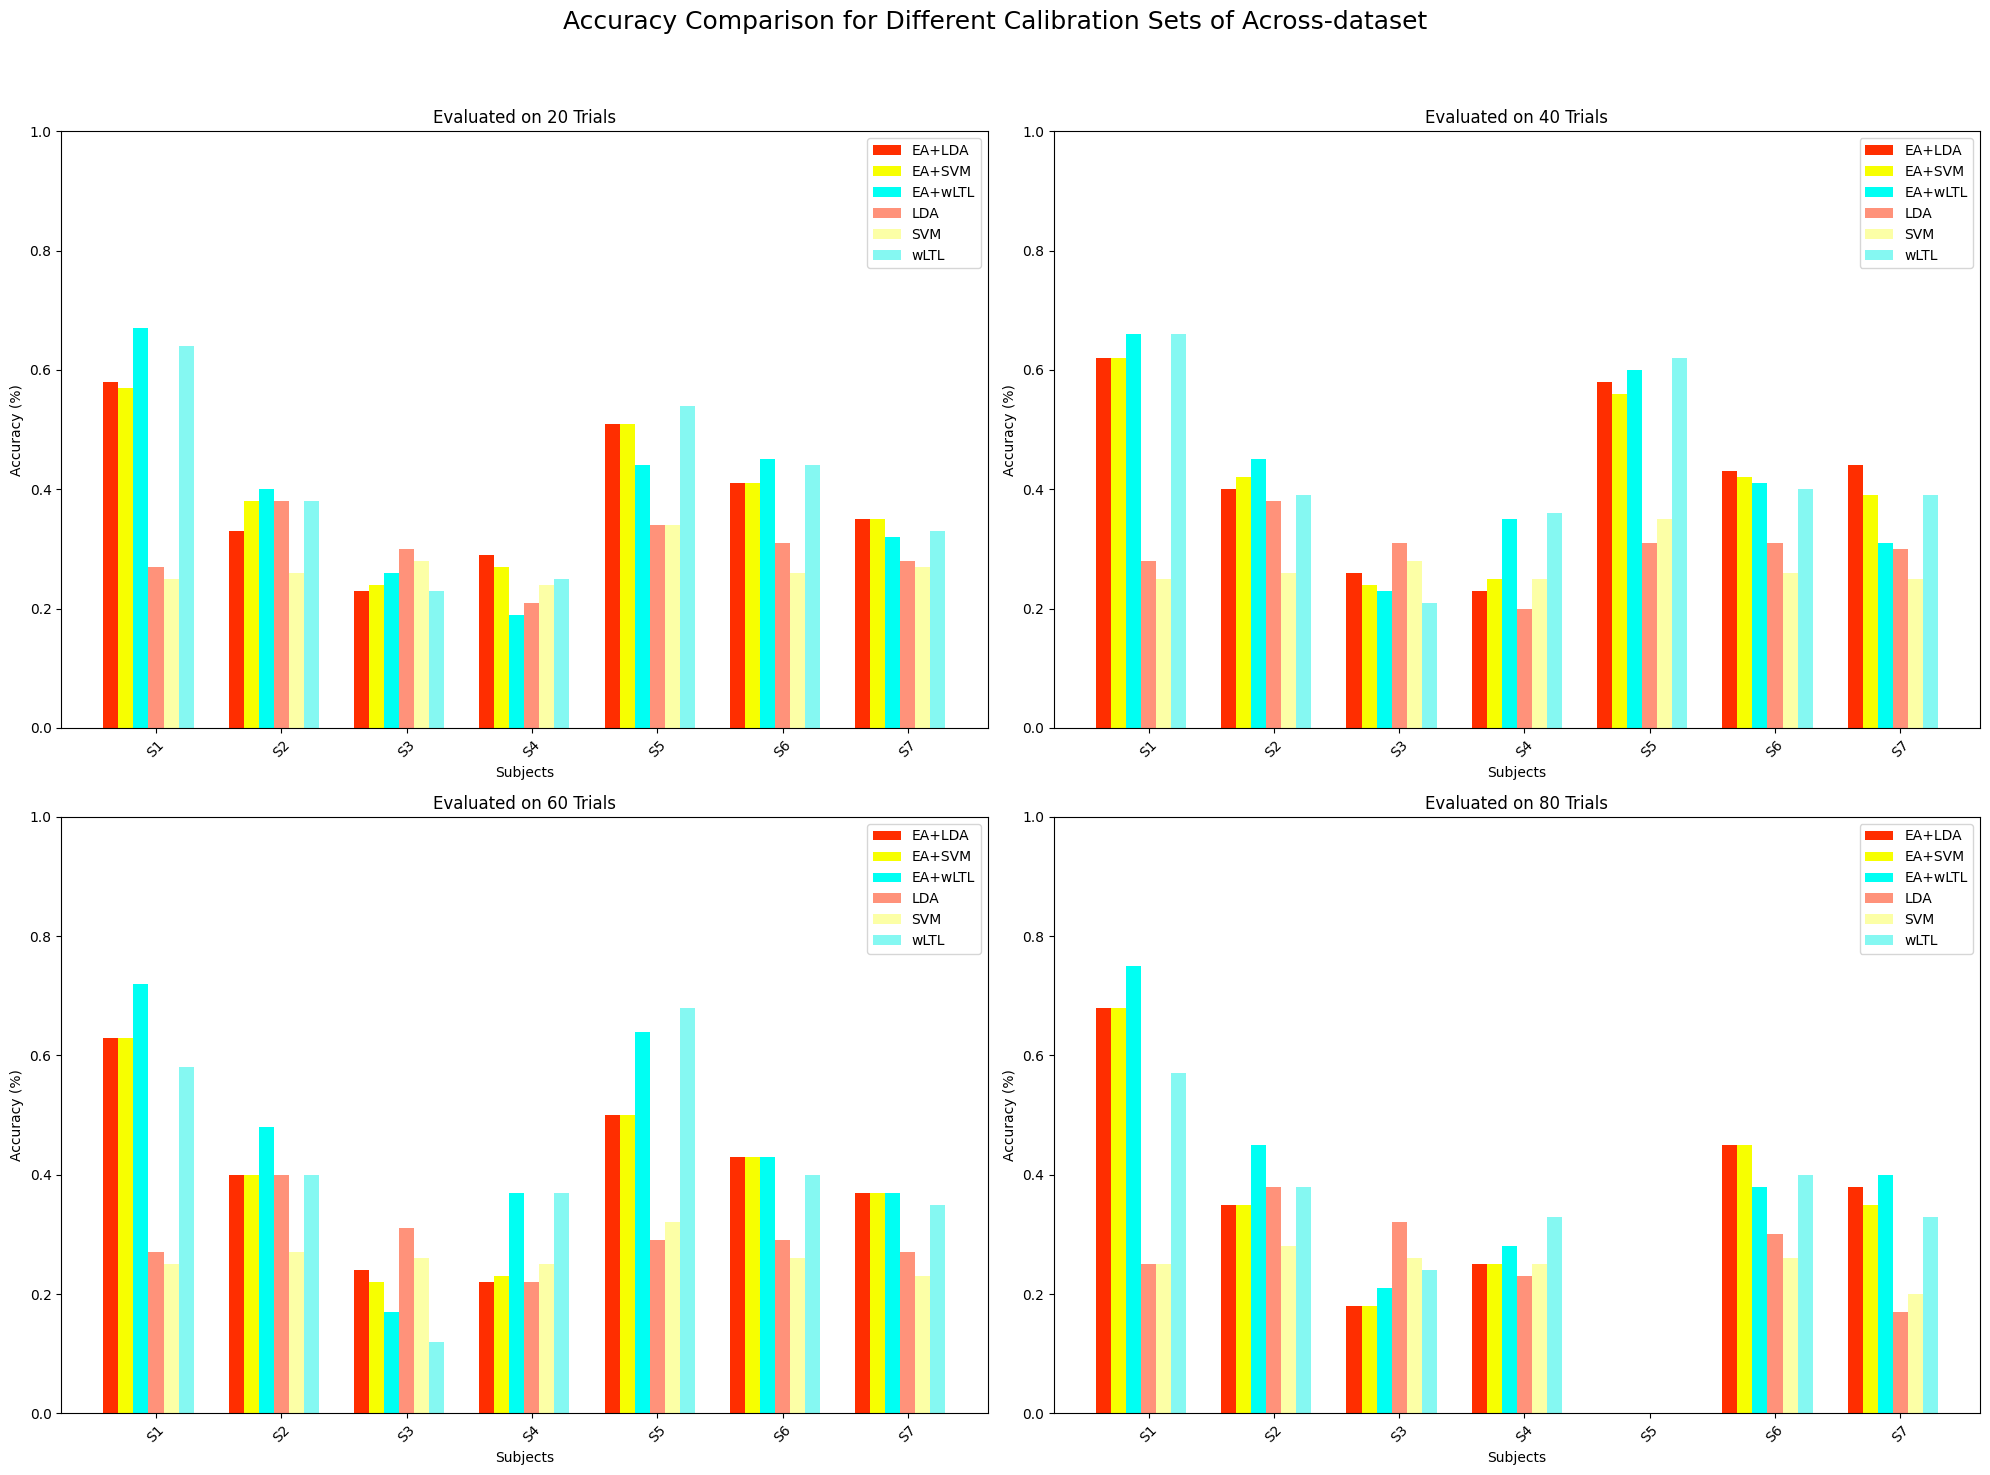

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load data from Excel
# Replace the path with your Excel file path if using locally
file_path = 'F:\\00_Nueron_maze\\BCI_TransferLearning\\Result.xlsx'  # Make sure this file is in your working directory
xls = pd.ExcelFile(file_path)

# Load the specific sheet
df_within_data = pd.read_excel(xls, sheet_name='TF_acrossData')

# Step 2: Extract relevant columns and clean the data
data_clean = df_within_data.iloc[1:, [0, 1, 6, 11, 16, 21]]  # Select relevant columns
data_clean.columns = ['Subject', 'Data Condition', '20 Trials', '40 Trials', '60 Trials', '80 Trials']

# Forward fill subject names to handle merged cells in original Excel sheet
data_clean['Subject'] = data_clean['Subject'].fillna(method='ffill')

# Step 3: Pivot the data to group by subject and data condition for easier extraction
pivoted_data = data_clean.pivot(index='Subject', columns='Data Condition', values=['20 Trials', '40 Trials', '60 Trials', '80 Trials'])

# Step 4: Extract accuracy values for each trial set
subject_labels = pivoted_data.index.tolist()  # Full subject labels
conditions = pivoted_data.columns.levels[1].tolist()  # Extract data condition names

# Extract data for each trial size (20, 40, 60, and 80 trials)
accuracy_20 = np.nan_to_num(pivoted_data['20 Trials'].values)
accuracy_40 = np.nan_to_num(pivoted_data['40 Trials'].values)
accuracy_60 = np.nan_to_num(pivoted_data['60 Trials'].values)
accuracy_80 = np.nan_to_num(pivoted_data['80 Trials'].values)

# Define a custom color palette for each condition
color_palette = ['#ff2e00', '#f7ff00', '#00fff3','#ff927a', '#fcffa6', '#85f8f2']

# Step 5: Define a function to plot grouped bars
def plot_grouped_bars(accuracy, title, ax, colors):
    x = np.arange(len(subject_labels))  # the label locations for subjects
    width = 0.12  # the width of the bars

    # Plot each condition as a separate bar within each group
    for i, (condition, color) in enumerate(zip(conditions, colors)):
        bars = ax.bar(x + i * width, accuracy[:, i], width, label=condition, color=color)

    # Formatting
    ax.set_ylim(0, 1)  # Set the y-axis range
    ax.set_xlabel('Subjects')
    ax.set_ylabel('Accuracy (%)')
    ax.set_title(title)
    ax.set_xticks(x + width * (len(conditions) / 2))
    ax.set_xticklabels(subject_labels, rotation=45)
    ax.legend(loc='upper right')

# Step 6: Create the plots for each calibration set
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Plotting for each calibration set separately
plot_grouped_bars(accuracy_20, 'Evaluated on 20 Trials', axes[0, 0], color_palette)
plot_grouped_bars(accuracy_40, 'Evaluated on 40 Trials', axes[0, 1], color_palette)
plot_grouped_bars(accuracy_60, 'Evaluated on 60 Trials', axes[1, 0], color_palette)
plot_grouped_bars(accuracy_80, 'Evaluated on 80 Trials', axes[1, 1], color_palette)

# Layout and overall title
plt.suptitle('Accuracy Comparison for Different Calibration Sets of Across-dataset', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plots
plt.show()
